In [2]:
# Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import datetime
import folium 
from folium.plugins import HeatMap
from tabulate import tabulate

In [3]:
# Formatos
pd.options.display.max_columns = 50

%matplotlib widget

In [4]:
def pretty_print(df_print):
    """ Print in a pretty format

    Args:
        df_print (pd.DataFrame): Dataframe to print
    """
    print(tabulate(df_print, headers='keys', tablefmt='psql'))

In [5]:
# Cargar datos: Remplazar path por donde cada uno tenga el archivo y el separador en caso de ser necesario
path_file = "original_data.csv"
# s = ";"
s = ","
df = pd.read_csv(path_file, sep=s)

/home/ale/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3251: DtypeWarning: Columns (41) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [6]:
#Saber el tamaño del dataframe
df.shape

(608001, 42)

In [7]:
#Ver los tipos de variables que contiene el archivo
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608001 entries, 0 to 608000
Data columns (total 42 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id_servicio           608001 non-null  float64
 1   fecha_inicio          608001 non-null  object 
 2   hora_inicio           608001 non-null  int64  
 3   id_resource           608001 non-null  float64
 4   Vehiculo              608001 non-null  object 
 5   VIP                   608001 non-null  object 
 6   id_cliente            608001 non-null  object 
 7   cliente               608001 non-null  object 
 8   segmento              608001 non-null  object 
 9   tipo_pago             608001 non-null  object 
 10  ciudad                608001 non-null  object 
 11  Microzona             608001 non-null  object 
 12  lat                   608001 non-null  float64
 13  long                  608001 non-null  float64
 14  address               608001 non-null  object 
 15  

In [8]:
#Cambiar a formato fecha: El formato puede cambiar dependiendo de la region del computador
# f = "%d/%m/%Y"
f = "%Y-%m-%d"
df["fecha_inicio"] = pd.to_datetime(df["fecha_inicio"],  format=f)

In [9]:
# rename pandas columns to lower case
df.columns= df.columns.str.lower()
df.columns

Index(['id_servicio', 'fecha_inicio', 'hora_inicio', 'id_resource', 'vehiculo',
       'vip', 'id_cliente', 'cliente', 'segmento', 'tipo_pago', 'ciudad',
       'microzona', 'lat', 'long', 'address', 'lat_2', 'long_2', 'ida_vuelta',
       'valor_total', 'valor_base', 'recargo_ida_vuelta', 'recargo_paradas',
       'recargo_distancia', 'recargo_tiempo', 'night_surcharge',
       'recargo_seguro', 'valor_descuento', 'parking_surcharge',
       'valor_declarado', 'distancia', 'estado', 'tipo_cancelado',
       'no_paradas', 'finalizado_fallido', 'tiempo_asignacion',
       'tiempo_recogida', 'tiempo_punto', 'tiempo_entrega', 'tiempo_cliente',
       'cumplimiento_promesa', 'industry', 'client type'],
      dtype='object')

In [10]:
# Mostrar columnas con datos faltantes
df.columns[df.isna().any().values]

Index(['tipo_cancelado', 'finalizado_fallido', 'tiempo_recogida',
       'tiempo_punto', 'tiempo_entrega', 'tiempo_cliente'],
      dtype='object')

In [11]:
# Ver valores en variables categoricas
categorical_columns = ["vehiculo", "vip", "segmento", "tipo_pago", "estado", "tipo_cancelado", "finalizado_fallido", "industry", "client type" ]
for col in cat_columns:
    print("Cateogires in '{}': {}".format(col, df[col].unique()))

Cateogires in 'vehiculo': ['Motocicleta' 'Bicicleta' 'Van' 'Automóvil/Van/Camioneta']
Cateogires in 'vip': ['No VIP' 'VIP Total' 'VIP Mensajeria' 'VIP Domicilios']
Cateogires in 'segmento': ['B2B' 'B2C']
Cateogires in 'tipo_pago': ['Datáfono' 'Efectivo' 'Pago on-line' 'Mixto']
Cateogires in 'estado': ['Cancelado' 'Finalizado']
Cateogires in 'tipo_cancelado': ['C4' nan 'C5' 'C6' 'C7' 'C1' 'C8' 'C2' 'C9' 'C3' 'C10']
Cateogires in 'finalizado_fallido': [nan  1.  0.]
Cateogires in 'industry': ['Ind5' 'Ind2' 'Ind6' 'Ind1' 'Ind4' 'Ind3' 'Ind10' 'Ind11' 'Ind7' 'Ind13'
 'Ind12']
Cateogires in 'client type': ['01' '03' '02' 'To Classify' 1 3 2]


In [ ]:
# print statistics from categorical columns
for col_name in categorical_columns:
    df_print = pd.DataFrame(round(df[col_name].value_counts(normalize=True)*100))
    df_print.columns = [" '{}' distribution %".format(col_name)]
    pretty_print(df_print)

In [12]:
# Nuevas columnas para graficar
df["dia_inicio"] = df.fecha_inicio.dt.day
df["dia_inicio_name"] = df.fecha_inicio.dt.day_name()

In [86]:
def count_plot(df_plot: pd.DataFrame, COL_NAME:str, TITLE:str, X_LABEL:str, Y_LABEL:str):
    """
    Graficar a coutplot
    Args:
        df_plot(pd.DataFrame): Dataframe with data to plot
        COL_NAME(str): name of the column to plot
        X_LABEL, Y_LABEL(str): laber for the axes
    Return:
        ax: figure
    """
    ax = plt.figure()
    ax = sns.countplot(x=COL_NAME, data=df_plot)
    ax.set_title(TITLE)
    ax.set_xlabel(X_LABEL)
    ax.set_ylabel(Y_LABEL)
    return ax

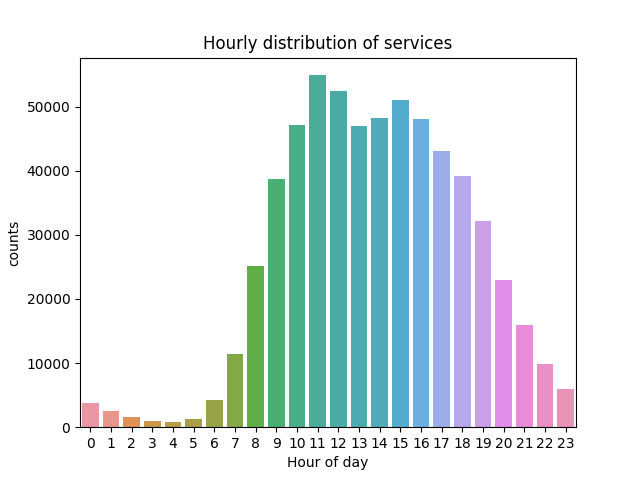

+-------+---------------+
|       |   hora_inicio |
|-------+---------------|
| count |  608001       |
| mean  |      13.7974  |
| std   |       4.19014 |
| min   |       0       |
| 25%   |      11       |
| 50%   |      14       |
| 75%   |      17       |
| max   |      23       |
+-------+---------------+


In [88]:
# Graficar count plot de variables categoricas.
# Para poder replicarlas sin tener que rehacer el codigo, guardar en listas el nombre de la columna, titulo grafica, x y y label
plot_dia_inicio =  ["dia_inicio_name", "Daily distribution of services", "Day of the week", "counts"]
plot_hora_inicio = ["hora_inicio", "Hourly distribution of services", "Hour of day", "counts"]
COL_NAME, TITLE, X_LABEL, Y_LABEL = plot_hora_inicio

# Graficar con parametros.
ax = count_plot(df, COL_NAME, TITLE, X_LABEL, Y_LABEL)
plt.show()

# imprimir descripcion de variables
df_print = pd.DataFrame(df[COL_NAME].describe())
pretty_print(df_print)

In [18]:
numerical_vars=['hora_inicio', 'lat', 'long', 'lat_2', 'long_2',
       'valor_total', 'valor_base', 'recargo_ida_vuelta', 'recargo_paradas',
       'recargo_distancia', 'recargo_tiempo', 'night_surcharge',
       'recargo_seguro', 'valor_descuento', 'parking_surcharge',
       'valor_declarado', 'distancia', 
       'no_paradas',  'tiempo_asignacion',
       'tiempo_recogida', 'tiempo_punto', 'tiempo_entrega', 'tiempo_cliente']

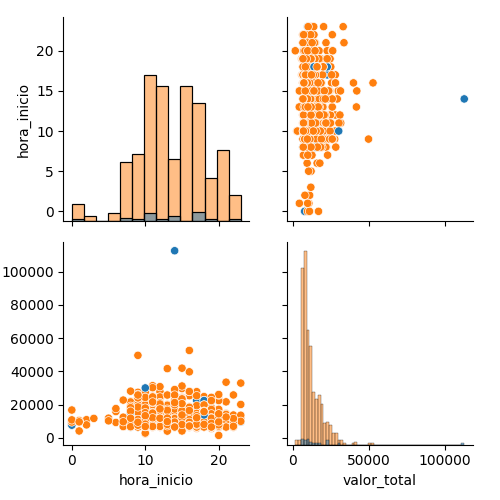

In [89]:
# select variables to plot
plot_vars = ['hora_inicio', 'valor_total']

# subsample data to plot scatter plot
df_sample = df.sample(frac=0.0001, replace=True, random_state=1)

# plot
g = sns.PairGrid(df_sample, vars=plot_vars, hue="estado")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
plt.show()